**Scenario**

The director of marketing believes the Cyclistic’s future success depends on maximizing the number of annual memberships. Therefore, analytics team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members.

**Stakeholders** 

Lily Moreno (the director of marketing department), Cyclistic marketing analytics team, Cyclistic executive team.

#### Step1: Ask


**Business task**  

Design marketing strategies aimed at converting casual riders into annual members.

The main goal of this analysis is to answer the key question: 
**“In what ways do members and casual riders use Divvy bikes differently?**

#### Step2: Prepare

With the purpose to accomplish Google Data analyst Capstone project has been used provided public data available in the cloud https://divvy-tripdata.s3.amazonaws.com/index.html.

The data has been made available by Motivate International Inc. under the license https://www.divvybikes.com/data-license-agreement. This is public data that will be used to explore how different customer types are using Cyclistic bikes. Data privacy is not violated. 

Data is separated in csv files by following naming convention: month, year and name of data set (e.g 202012-divvy-tripdata.csv). For this analysis is used the previous 12 months of Cyclistic trip data starting from December 2020 to November 2021.

All analysis had been done with R programming language since its more comfortable and appropriate to work with big data set.

**Installation and loading of required packages**

In [1]:
# tidyverse for data import and wrangling
install.packages("tidyverse")
library(tidyverse)  #helps wrangle data

# lubridate for date functions
install.packages("lubridate")
library(lubridate)  #helps wrangle date attributes

# ggplot for visualization
install.packages("ggplot")
library(ggplot2)  #helps visualize data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in value[[3L]](cond): Package ‘lubridate’ version 1.7.10 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘lubridate’ is imported by ‘tidyverse’ so cannot be unloaded



**Collecting data**

Uploading Divvy data sets (csv files) of last 12 months (December 2020-November 2021).

In [ ]:
m12_2020 <- read_csv("../input/divvydataset12-202011-2021/202012-divvy-tripdata.csv")
m01_2021 <- read_csv("../input/divvydataset12-202011-2021/202101-divvy-tripdata.csv")
m02_2021 <- read_csv("../input/divvydataset12-202011-2021/202102-divvy-tripdata.csv")
m03_2021 <- read_csv("../input/divvydataset12-202011-2021/202103-divvy-tripdata.csv")
m04_2021 <- read_csv("../input/divvydataset12-202011-2021/202104-divvy-tripdata.csv")
m05_2021 <- read_csv("../input/divvydataset12-202011-2021/202105-divvy-tripdata.csv")
m06_2021 <- read_csv("../input/divvydataset12-202011-2021/202106-divvy-tripdata.csv")
m07_2021 <- read_csv("../input/divvydataset12-202011-2021/202107-divvy-tripdata.csv")
m08_2021 <- read_csv("../input/divvydataset12-202011-2021/202108-divvy-tripdata.csv")
m09_2021 <- read_csv("../input/divvydataset12-202011-2021/202109-divvy-tripdata.csv")
m10_2021 <- read_csv("../input/divvydataset12-202011-2021/202110-divvy-tripdata.csv")
m11_2021 <- read_csv("../input/divvydataset12-202011-2021/202111-divvy-tripdata.csv")

**Checking  the  dataframe for discovering incongruencies and fixing the  errors.**

* Checking columns names

*Note: columns names are consistent, no need for further changes*

In [ ]:
colnames(m12_2020)
colnames(m01_2021)
colnames(m02_2021)
colnames(m03_2021)
colnames(m04_2021)
colnames(m05_2021)
colnames(m06_2021)
colnames(m07_2021)
colnames(m08_2021)
colnames(m09_2021)
colnames(m10_2021)
colnames(m11_2021)

* Checking the structure of data

In [ ]:
str(m12_2020)
str(m01_2021)
str(m02_2021)
str(m03_2021)
str(m04_2021)
str(m05_2021)
str(m06_2021)
str(m07_2021)
str(m08_2021)
str(m09_2021)
str(m10_2021)
str(m11_2021)

* Combining all csv files from last 12months into a single file.

In [ ]:
joined_df <-rbind(m12_2020,m01_2021,m02_2021,m03_2021,m04_2021,m05_2021,m06_2021,
                  m07_2021,m08_2021,m09_2021,m10_2021,m11_2021)

* Removing start_lat, start_lng, end_lat and end_lng fields which are not necessary for analysis.

In [ ]:
joined_df <- joined_df %>%
    select(-c(start_lat, start_lng, end_lat, end_lng))

#### Step3: Process


**Data cleaning and preparation for analysis.** 

1. Checking the data and removing incongruities.

* Presenting the first 6 rows

In [ ]:
head(joined_df)

* Presenting the last 6 rows

In [ ]:
tail(joined_df)  

* Checking the names of the columns

In [ ]:
colnames(joined_df)  

* Checking number of rows

In [ ]:
nrow(joined_df)

* Checking dimension of the data frame (rows/columns)

In [ ]:
dim(joined_df) 

* Checking the data structure

In [ ]:
str(joined_df)

* Showing statistical summary of the data set

In [ ]:
summary(joined_df)

2. Checking *Member_Casual* column variables

    *Note: only available member and casual user types. No need for further changes.*

In [ ]:
unique(joined_df$member_casual)

3. Checking existence of empty rows and columns.

In [ ]:
sum(is.na(joined_df) == nrow(joined_df))
sum(is.na(joined_df) == ncol(joined_df))

4. Checking existence of duplicate values in the column *ride_id*.

    *Note: data set does not have duplicates.*

In [ ]:
joined_df[duplicated(joined_df$ride_id),]

5. Looking the number of observations per each user type

In [ ]:
table(joined_df$member_casual)

6. Adding columns date, month, day, and year of each ride.

In [ ]:
joined_df$date <- as.Date(joined_df$started_at) #The default format is yyyy-mm-dd
joined_df$month <- format(as.Date(joined_df$date), "%m")
joined_df$day <- format(as.Date(joined_df$date), "%d")
joined_df$year <- format(as.Date(joined_df$date), "%Y")
joined_df$day_of_week <- format(as.Date(joined_df$date), "%A")

7. Adding a *ride_length* column for calculation rides' duration (in seconds)

In [ ]:
joined_df$ride_length <- difftime(joined_df$ended_at,joined_df$started_at)

8. Inspecting the data structure of the columns

In [ ]:
str(joined_df)

9. Checking the data structure of the new created *ride_length* column

In [ ]:
str(joined_df$ride_length)

10. Converting *ride_length* column from factor to numeric for making calculations on the data

In [ ]:
is.factor(joined_df$ride_length)
joined_df$ride_length <- as.numeric(as.character(joined_df$ride_length))
is.numeric(joined_df$ride_length)

11. Removing "bad" data

Cleaning data by removing rows where *ride_length* value is negative. 
Saving data in the new data frame *joined_df_v2*.

In [ ]:
joined_df_v2 <- joined_df[!(joined_df$ride_length<0),]

#### Step4: Analyse


1. Conducting descriptive analysis on *ride_length* column (all figures in seconds)

* Average duration of trips

In [ ]:
mean(joined_df_v2$ride_length)

The average duration of trips is taking about 22.13 minutes.

* The longest trip duration

In [ ]:
max(joined_df_v2$ride_length) 

The longest ride is taking about 38 days and 20.4hours.


* The shortest trip duration

In [ ]:
min(joined_df_v2$ride_length)

* Summary of descriptive analysis

In [ ]:
summary(joined_df_v2)

2. Comparing the average, longest and shortest trips duration for annual and occasional riders.

* Average travel duration

In [ ]:
aggregate(joined_df_v2$ride_length ~ joined_df_v2$member_casual, FUN = mean)

Average ride length for casual riders is taking about 
32.18 minutes, while the average ride time is more than 2 times less for members. Member type of users average ride time is 13.76 minutes.

* Longest travel duration

In [ ]:
aggregate(joined_df_v2$ride_length ~ joined_df_v2$member_casual, FUN = max)

Besides of having higher average ride time, casual riders also have longer travel duration. For casual riders it take about 38 days and 20.4 hours while for members it takes 1 day and 2 hours.



* Shortest travel duration

In [ ]:
aggregate(joined_df_v2$ride_length ~ joined_df_v2$member_casual, FUN = min)

* The average duration of ride by each weekday per user type

In [ ]:
aggregate(joined_df_v2$ride_length ~ joined_df_v2$member_casual + 
            joined_df_v2$day_of_week, FUN = mean)

Arranging the days of the week by order starting from Sunday to Monday.

In [ ]:
joined_df_v2$day_of_week <- ordered(joined_df_v2$day_of_week, 
                                    levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

* Discovering patterns between the average duration of ride by each day for members and casual users on weekday order

In [ ]:
aggregate(joined_df_v2$ride_length ~ joined_df_v2$member_casual +
            joined_df_v2$day_of_week, FUN = mean)

There is interesting patterns found out here when was analyzing the average duration of rides for members and casual users on weekdays. 
Casual users average ride time is highest on Sunday 37.74min and lowest on Wednesday 27.74min. 
In case of members the highest average ride time is on Sunday 15.77min and the lowest is on Tuesday 12.86min.
 


* Analyzing ridership data by user type and day of the week

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%                  #groups by user type and weekday
  summarise(number_of_rides = n()                       #calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>%  # calculates the average duration
  arrange(member_casual, weekday)                       # sorts

Creating a visualization of number of rides vs user type per weekday

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Usage of bicycles", subtitle = "By day of the week", x = "Day of week", y = "Number of Rides", fill = 'User type')+
  geom_col(position = "dodge")

Summing up we can clearly notice that casual users have higher number of rides and average ride time on Friday, Saturday and Sunday. We can conclude that they use bikes in their free time maybe for leisure and fun. While this is completely contradiction for member type of users. They use bikes as a transportation for going to work, university or school.

* Analyzing average duration of travel by user type and weekday

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday) 

Creating a visualization of average duration of rides per user type

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Usage of bicycles", subtitle = "By average duration", x = "Day of week", y = "Average duration", fill = 'User type')+
  
  geom_col(position = "dodge")

The visualization clearly shows that casual users generally spend more time on rides than members.
Surprisingly was discovered that the average duration of trips for casual users is more than 2 times higher than for members.

* Discovering the most preferred type of bicycles for use during weekday

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(rideable_type) %>%
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(joined_df_v2))*100,
            members_count=sum(member_casual=="member"),
            casual_count=sum(member_casual=="casual"))

Creating a visualization for usage of specific type of bicycle during a week per user type

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  ggplot(aes(rideable_type, fill = member_casual)) +
    
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Bicycle type per user", subtitle = "By day of week", x = "Bicycle type", y = "Number of Rides", fill = 'User type')+
    geom_bar()+
    facet_wrap(~weekday)+
    theme(axis.text.x = element_text(angle=70))

In order to explore which type of bicycles both users prefer to ride per weekday the graph was drawn. We can clearly see that both casual and member type of users prefer ride classic type of the bikes.


* Monthly rides number per user type

In [ ]:
joined_df_v2 %>% 
  mutate(month = month(started_at, label= TRUE)) %>% 
  group_by(member_casual, month) %>%
  summarize(number_of_rides =n(),average_duration = mean(ride_length)) %>%
  arrange(member_casual,month)

Visualization of number of rides on monthly matter per user type

In [ ]:
ggplot(joined_df_v2, aes(month(started_at), fill=member_casual))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Use of the bicycle",subtitle = "By month", x = "Month", y = "Number of Rides", fill = 'Type of user')+
  geom_bar()

This graph is showing in which months or seasons the usage of bicycles is higher. Looking deeply to our finding we can see that the highest number of rides casual users have in July, while the members have in August. Seasonal analysis shows that demand of bikes is higher in Summer both for casual and member type of users.


* Number of casual vs member types of users

In [ ]:
joined_df_v2 %>%
  group_by(member_casual) %>%
  summarize(number_of_rides =n())

ggplot(joined_df_v2, aes(member_casual, fill=member_casual))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Users",subtitle = "Comparison of the number of users", x = "Users", y = "Number of Users", fill = 'Type of user')+
  geom_bar()

Company has more member type of users than casual riders.



**Summary of Analysis**

1. Despite of having more member type of riders than casual riders, the average duration of trips for casual riders is more than for members. Casual users average ride time is highest on Sunday 37.74 minutes and lowest on Wednesday 27.74 minutes. The highest average ride time for members is on Sunday 15.77 minutes and the lowest is on Tuesday 12.86 minutes. 

2. Clearly noticeable that casual users have higher number of rides and average ride time on weekend. So, casual users  mainly ride bikes in their free time maybe for leisure and fun. Contradictory to them member type of users ride bikes more often during working days. As a result they use bikes as a transportation for going to work, university or school.

3. Both casual and member type of users prefer ride classic type of the bikes, followed by electric type of bike.

4. The highest number of rides casual users have in July, while the members have in August. By looking the data we see that the demand of bikes significantly is increasing from the end of the Spring and becoming the highest in the Summer season both for casual and member type of users and the lower on winter.

5. Surprisingly annual users overpass the occasional users.


**Conclusion**

Analysis shows that despite the company has more member type of users than casual once the average ride time is higher for casual users than for the members. Marketing team should be more concentrated on casual users and design marketing strategies in Summer either engaging new customers with casual membership or attracting member users to become casual users.
Besides of it, company should get more classic type of bikes, since it has higher demand from both type of users.

#### Step5: Share

##### **Slide 1**

 **Case Study: How Does a Bike-Share Navigate Speedy Success of Cyclistic company?**
 
 Author: Lilit Hayrapetyan
 
 Last update: 1/4/2022


##### **Slide 2**

**Structure**

* Introduction

* Annual vs occasional users
 
* Usage of bicycles by day of week

* Average duration of rides per day of week

* Bicycle type per user by day of week

* Monthly usage per user type

* Conclusion

* Reccomendation & future analysis

##### **Slide 3**

**Introduction**

Marketing team of Cyclistic company believes the company's future success depends on maximizing the number of annual memberships.
Analytics team of Cyclistic company wants to understand how casual riders and annual members use Cyclistic bikes differently with the purpose to designing marketing strategies aimed at converting casual riders into annual members.

##### **Slide 4**

**Annual and occasional users**

In [ ]:
ggplot(joined_df_v2, aes(member_casual, fill=member_casual))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Users",subtitle = "Comparison of the number of users", x = "Users", y = "Number of Users", fill = 'Type of user')+
  geom_bar()

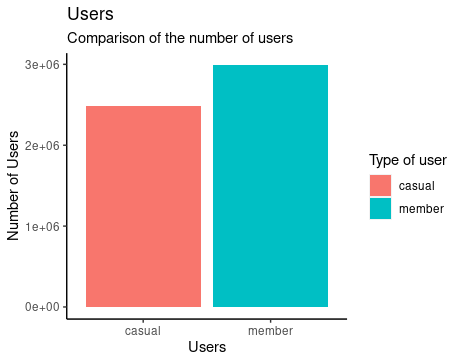

##### **Slide 5**

**Usage of bicycles by day of week**

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Usage of bicycles", subtitle = "By day of the week", x = "Day of week", y = "Number of Rides", fill = 'User type')+
  geom_col(position = "dodge")

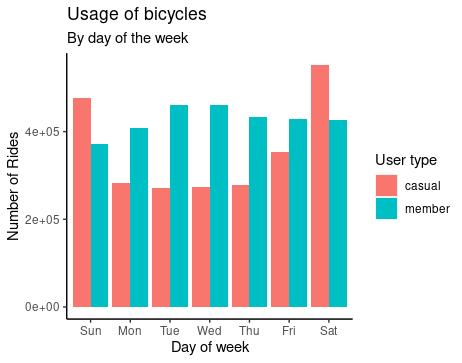

##### **Slide 6**

**Average duration of rides per day of week** 

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Usage of bicycles", subtitle = "By average duration", x = "Day of week", y = "Average duration", fill = 'User type')+
  
  geom_col(position = "dodge")

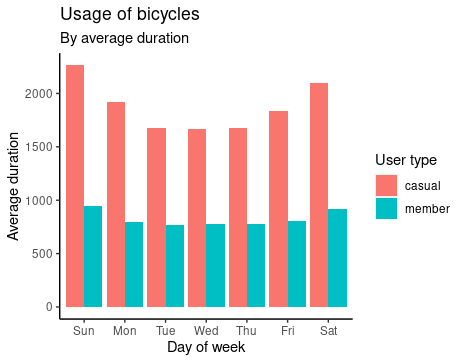

##### **Slide 7**

**Bicycle type per user by day of week**

In [ ]:
joined_df_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  ggplot(aes(rideable_type, fill = member_casual)) +
    
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Bicycle type per user", subtitle = "By day of week", x = "Bicycle type", y = "Number of Rides", fill = 'User type')+
    geom_bar()+
    facet_wrap(~weekday)+
    theme(axis.text.x = element_text(angle=70))

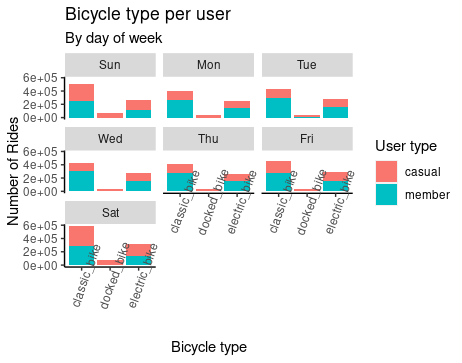

##### **Slide 8**

**Monthly usage per user type**

In [ ]:
ggplot(joined_df_v2, aes(month(started_at), fill=member_casual))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
  labs(title = "Use of the bicycle",subtitle = "By month", x = "Month", y = "Number of Rides", fill = 'Type of user')+
  geom_bar()
```

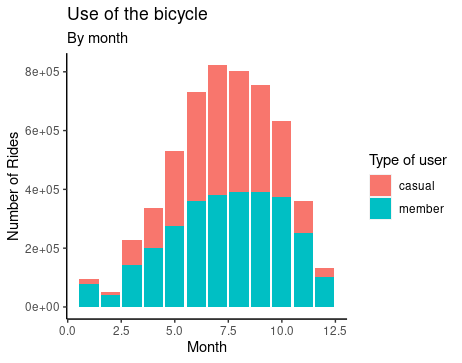

##### **Slide 9**

**Conclusion**

* Surprisingly annual users overpass the occasional users.

* Despite of having higher number of annual riders, the average duration of trips for casual riders is longer than for members. Casual users average ride time is highest on Sunday 37.74min and lowest on Wednesday 27.74min. The highest average ride time for annual users is on Sunday 15.77min and the lowest is on Tuesday 12.86min. 

* Casual users make more rides and spend more average riding time on weekend. So, casual users  mainly ride bikes in their free time maybe for leisure and for fun. 
Contradictory to them annual users ride bikes more often during weekday. So, we conclude they use bikes as a transportation for going to work, university or school.

* Both occasional and annual users prefer to ride classic type of the bikes, followed by electric type of the bike.

* The highest number of rides casual users have in July, while the annual members have in August. Generally, the demand of bikes significantly is increasing from the end of the Spring and becoming the highest in the Summer both for casual and member type of users and the lower on winter.

##### **Slide 10**

**Recommendations**

* Design marketing strategies either for attracting new casual user or converting annual riders to casual riders.

* Implement marketing plan at the beginning of Summer since the usage of bikes has highest number in Summer season.

* Acquire more classic type of bikes, since it has the highest demand.



**Future Analysis**

* Collect information about stations for making analysis per station.

* Collect information about supply and demand of all type of bicycles per station.

#### Step6: Act

**Recommendations**

* Design marketing strategies either for attracting new casual user or converting annual riders to casual riders.

* Implement marketing plan at the beginning of Summer since the usage of bikes has highest number in Summer season.

* Acquire more classic type of bikes, since it has the highest demand.



**Future Analysis**

* Collect information about stations for making analysis per station.

* Collect information about supply and demand of all type of bicycles per station.